<a href="https://colab.research.google.com/github/edelmode/Data-Exploration/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4fc8b1f565a774d5bf1c57b5e673dc8c943f32cf8cf8dec22ac9ab3ac970b097
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:

!pip install findspark

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle_datasets.csv to kaggle_datasets.csv


In [ ]:
from pyspark import SparkContext, SparkConf

# Stop existing SparkContext if running
if 'sc' in locals():
    sc.stop()

# Set up the Spark context
conf = SparkConf().setAppName("BigDataLab").setMaster("local")
sc = SparkContext(conf=conf)

# Get the uploaded file name
dataset_path = list(uploaded.keys())[0]

# Load the dataset into an RDD
rdd = sc.textFile(f"/content/{dataset_path}")

# Remove header
header = rdd.first()
rdd = rdd.filter(lambda line: line != header)

# Split each line into a list of values (CSV format)
rdd = rdd.map(lambda line: line.split(','))

# Apply the map transformation to extract the first column
mapped_rdd = rdd.map(lambda fields: (fields[0], fields))

# Apply the filter transformation to filter out rows where the first column is empty
filtered_rdd = mapped_rdd.filter(lambda x: x[0] != '')

# Optional: Apply flatMap if necessary (example)
flat_mapped_rdd = rdd.flatMap(lambda fields: [(field, 1) for field in fields])

# Optional: Apply union with itself (example)
union_rdd = rdd.union(rdd)

# Perform some actions to collect data
sample_data = filtered_rdd.take(5)

# Display sample data in a vertical format
print("Sample Data after Map and Filter:")
for row in sample_data:
    print("---- Row ----")
    for field in row:
        print(field)

# Count the number of rows
row_count = filtered_rdd.count()
print("\nTotal Rows after Filter:")
print(row_count)

Sample Data after Map and Filter:
---- Row ----
"Trending YouTube Video Statistics (UPDATED)"
['"Trending YouTube Video Statistics (UPDATED)"', '"Daily statistics (views', ' likes', ' category', ' tags+) for trending YouTube videos"', '"https://www.kaggle.com/datasnaek/youtube-new"', '"Mitchell J"', '3', '4', '9484', '1668', '2018-01-16', '"CC0"', '35087677', '1', '0', '46']
---- Row ----
"7ecb8f4fe2ece9f4c8ffd23af10c310f"
['"7ecb8f4fe2ece9f4c8ffd23af10c310f"', '""', '"https://www.kaggle.com/veralei/7ecb8f4fe2ece9f4c8ffd23af10c310f"', '"Vera Lei"', '0', '0', '55', '2', '2018-01-16', '"Other"', '127264365', '0', '0', '0']
---- Row ----
"Atom Dataset"
['"Atom Dataset"', '"Dataset with atom features"', '"https://www.kaggle.com/chfly2000/nomad2018-atom-dataset"', '"chfly2000"', '0', '0', '26', '1', '2018-01-16', '"Other"', '0', '0', '0', '0']
---- Row ----
"tmptmp"
['"tmptmp"', '""', '"https://www.kaggle.com/ilyaivanchenko/tmptmp"', '"snow2011"', '0', '0', '12', '1', '2018-01-16', '"CC0"',

In [ ]:
from google.colab import drive
from pyspark import SparkContext, SparkConf

# Mount Google Drive
drive.mount('/content/drive')

# Set up the Spark context
conf = SparkConf().setAppName("BigDataLab").setMaster("local")

# Try to get existing SparkContext, or create a new one if it doesn't exist
try:
    sc = SparkContext.getOrCreate(conf=conf)
except ValueError:
    # If an existing SparkContext exists, stop it and create a new one
    sc.stop()
    sc = SparkContext(conf=conf)

# Define the path to your dataset in Google Drive
dataset_path = '/content/drive/My Drive/Colab Notebooks/datasets.csv'

# Load the dataset into an RDD
rdd = sc.textFile(dataset_path)

# Remove header
header = rdd.first()
rdd = rdd.filter(lambda line: line != header)

# Split each line into a list of values (CSV format)
rdd = rdd.map(lambda line: line.split(','))

# Display initial data (before transformations)
initial_data = rdd.take(5)
print("Initial Data:")
for row in initial_data:
    print(row)

# Apply the map transformation to extract the first column
mapped_rdd = rdd.map(lambda fields: (fields[0], fields))

# Apply the filter transformation to filter out rows where the first column is empty
filtered_rdd = mapped_rdd.filter(lambda x: x[0] != '')

# Optional: Apply flatMap if necessary (example)
flat_mapped_rdd = rdd.flatMap(lambda fields: [(field, 1) for field in fields])

# Optional: Apply union with itself (example)
union_rdd = rdd.union(rdd)

# Perform actions to collect data and show transformations

# Collect action
collected_data = filtered_rdd.collect()
print("\nCollected Data after Map and Filter:")
for row in collected_data[:5]:  # Limiting to first 5 for display
    print(row)

# Take action
sample_data = filtered_rdd.take(5)
print("\nSample Data after Map and Filter (using take):")
for row in sample_data:
    print(row)

# First action
first_data = filtered_rdd.first()
print("\nFirst Data after Map and Filter (using first):")
print(first_data)

# Count action
row_count = filtered_rdd.count()
print("\nTotal Rows after Filter (using count):")
print(row_count)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial Data:
['"Trending YouTube Video Statistics (UPDATED)"', '"Daily statistics (views', ' likes', ' category', ' tags+) for trending YouTube videos"', '"https://www.kaggle.com/datasnaek/youtube-new"', '"Mitchell J"', '3', '4', '9484', '1668', '2018-01-16', '"CC0"', '35087677', '1', '0', '46']
['"7ecb8f4fe2ece9f4c8ffd23af10c310f"', '""', '"https://www.kaggle.com/veralei/7ecb8f4fe2ece9f4c8ffd23af10c310f"', '"Vera Lei"', '0', '0', '55', '2', '2018-01-16', '"Other"', '127264365', '0', '0', '0']
['"Atom Dataset"', '"Dataset with atom features"', '"https://www.kaggle.com/chfly2000/nomad2018-atom-dataset"', '"chfly2000"', '0', '0', '26', '1', '2018-01-16', '"Other"', '0', '0', '0', '0']
['"tmptmp"', '""', '"https://www.kaggle.com/ilyaivanchenko/tmptmp"', '"snow2011"', '0', '0', '12', '1', '2018-01-16', '"CC0"', '1635900', '0', '0', '0']
['"Lab 1 Matrix"', '""', 

In [ ]:
# Sort the RDD by key
sorted_rdd = filtered_rdd.sortByKey()

# Group the data by key
grouped_rdd = filtered_rdd.groupByKey()

# Collect and print the sorted data
sorted_data = sorted_rdd.collect()
print("\nSorted Data:")
for row in sorted_data[:5]:  # Limiting to first 5 for display
    print(row)

# Collect and print the grouped data
grouped_data = grouped_rdd.collect()
print("\nGrouped Data:")
for key, values in grouped_data[:5]:  # Limiting to first 5 keys for display
    print(key, list(values))


Sorted Data:
('" "', ['" "', '""', '"https://www.kaggle.com/noahlumos/test-dataset"', '"Noah Schwartz"', '0', '0', '11', '0', '2018-01-15', '"CC4"', '61627', '0', '0', '0'])
('" Beijing PM2.5 Data Data Set "', ['" Beijing PM2.5 Data Data Set "', '""', '"https://www.kaggle.com/djhavera/beijing-pm25-data-data-set"', '"David Havera"', '0', '0', '248', '36', '2017-10-18', '"CC0"', '2010494', '0', '0', '0'])
('" Bestseller books on Paytm"', ['" Bestseller books on Paytm"', '" 1500 bestseller books on Paytm"', '"https://www.kaggle.com/PromptCloudHQ/bestseller-books-on-paytm"', '"PromptCloud"', '0', '0', '1901', '215', '2017-09-15', '"CC4"', '2483706', '1', '0', '7'])
('" Hotels on Makemytrip"', ['" Hotels on Makemytrip"', '"Details of 20', '000 hotels on MakeMyTrip.com"', '"https://www.kaggle.com/PromptCloudHQ/hotels-on-makemytrip"', '"PromptCloud"', '0', '0', '2718', '434', '2017-09-16', '"CC4"', '37834880', '1', '0', '10'])
('" InceptionV3 "', ['" InceptionV3 "', '""', '"https://www.kaggl

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("BigDataLab") \
    .getOrCreate()

# Define the path to your dataset
dataset_path = '/content/drive/My Drive/Colab Notebooks/datasets.csv'

# Read the CSV file into a DataFrame
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

# Show the initial DataFrame
print("Initial DataFrame:")
df.show(10)

# Perform transformations
# a. select()
selected_df = df.select("title", "views")

# b. filter()
filtered_df = df.filter(df["views"] > 100)

# c. groupby()
grouped_df = df.groupBy("title").agg({"views": "mean"})

# d. orderby()
ordered_df = df.orderBy("title")

# e. dropDuplicates()
deduplicated_df = df.dropDuplicates()

# f. withColumnRenamed()
renamed_df = df.withColumnRenamed("title", "new_column_name")

# Show transformed DataFrames
print("\nTransformed DataFrames:")
selected_df.show(10)
filtered_df.show(10)
grouped_df.show(10)
ordered_df.show(10)
deduplicated_df.show(10)
renamed_df.show(10)

# Stop the SparkSession
spark.stop()

Initial DataFrame:
+--------------------+--------------------+--------------------+---------------+-------+-----------+-----+---------+------------+-------+---------+--------+--------------+-------+
|               title|         description|                 url|          owner|kernels|discussions|views|downloads|last_updated|license|     size|featured|super_featured|upvotes|
+--------------------+--------------------+--------------------+---------------+-------+-----------+-----+---------+------------+-------+---------+--------+--------------+-------+
|Trending YouTube ...|Daily statistics ...|https://www.kaggl...|     Mitchell J|      3|          4| 9484|     1668|  2018-01-16|    CC0| 35087677|       1|             0|     46|
|7ecb8f4fe2ece9f4c...|                NULL|https://www.kaggl...|       Vera Lei|      0|          0|   55|        2|  2018-01-16|  Other|127264365|       0|             0|      0|
|        Atom Dataset|Dataset with atom...|https://www.kaggl...|      chfly2000| 

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder \
    .appName("BigDataLab") \
    .getOrCreate()

# Define the path to the dataset
dataset_path = "/content/drive/My Drive/Colab Notebooks/datasets.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

# Show the initial DataFrame
print("Initial DataFrame:")
df.show(10)

# Register the DataFrame as a temporary SQL table
df.createOrReplaceTempView("youtube_videos")

# Question 1 - What is the average number of views for videos based on their license type?
average_views_by_license = spark.sql("""
    SELECT license, AVG(views) AS average_views
    FROM youtube_videos
    GROUP BY license
    ORDER BY average_views DESC
""")
print("Average number of views by license type:")
average_views_by_license.show()

# Question 2 - Which video titles have the highest number of upvotes, and how many views do they have?
top_upvoted_videos = spark.sql("""
    SELECT title, upvotes, views
    FROM youtube_videos
    ORDER BY upvotes DESC, views DESC
    LIMIT 10
""")
print("Top upvoted videos and their views:")
top_upvoted_videos.show()

# Question 3 - Is there a correlation between the number of discussions and the number of views a video receives?
correlation_discussions_views = spark.sql("""
    SELECT discussions, views
    FROM youtube_videos
""")
print("Correlation between discussions and views:")
correlation_discussions_views.show()

# Stop the SparkSession
spark.stop()

Mounted at /content/drive
Initial DataFrame:
+--------------------+--------------------+--------------------+---------------+-------+-----------+-----+---------+------------+-------+---------+--------+--------------+-------+
|               title|         description|                 url|          owner|kernels|discussions|views|downloads|last_updated|license|     size|featured|super_featured|upvotes|
+--------------------+--------------------+--------------------+---------------+-------+-----------+-----+---------+------------+-------+---------+--------+--------------+-------+
|Trending YouTube ...|Daily statistics ...|https://www.kaggl...|     Mitchell J|      3|          4| 9484|     1668|  2018-01-16|    CC0| 35087677|       1|             0|     46|
|7ecb8f4fe2ece9f4c...|                NULL|https://www.kaggl...|       Vera Lei|      0|          0|   55|        2|  2018-01-16|  Other|127264365|       0|             0|      0|
|        Atom Dataset|Dataset with atom...|https://www.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder \
    .appName("BigDataLab") \
    .getOrCreate()

# Define the path to the dataset
dataset_path = "/content/drive/My Drive/Colab Notebooks/datasets.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

# Show the initial DataFrame
print("Initial DataFrame:")
df.show(10)

# Register the DataFrame as a temporary SQL table
df.createOrReplaceTempView("youtube_videos")

# Question 1 - What is the average number of views for videos based on their license type?
average_views_by_license = spark.sql("""
    SELECT license, AVG(views) AS average_views
    FROM youtube_videos
    GROUP BY license
    ORDER BY average_views DESC
""")
print("Average number of views by license type:")
average_views_by_license.show()

# Question 2 - Which video titles have the highest number of upvotes, and how many views do they have?
top_upvoted_videos = spark.sql("""
    SELECT title, upvotes, views
    FROM youtube_videos
    ORDER BY upvotes DESC, views DESC
    LIMIT 10
""")
print("Top upvoted videos and their views:")
top_upvoted_videos.show()

# Question 3 - View the top 20 rows with the highest number of discussions and views
top_discussions_views = spark.sql("""
    SELECT discussions, views
    FROM youtube_videos
    ORDER BY discussions DESC, views DESC
    LIMIT 20
""")
print("Top 20 rows with the highest number of discussions and views:")
top_discussions_views.show()

# Stop the SparkSession
spark.stop()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial DataFrame:
+--------------------+--------------------+--------------------+---------------+-------+-----------+-----+---------+------------+-------+---------+--------+--------------+-------+
|               title|         description|                 url|          owner|kernels|discussions|views|downloads|last_updated|license|     size|featured|super_featured|upvotes|
+--------------------+--------------------+--------------------+---------------+-------+-----------+-----+---------+------------+-------+---------+--------+--------------+-------+
|Trending YouTube ...|Daily statistics ...|https://www.kaggl...|     Mitchell J|      3|          4| 9484|     1668|  2018-01-16|    CC0| 35087677|       1|             0|     46|
|7ecb8f4fe2ece9f4c...|                NULL|https://www.kaggl...|       Vera Lei|      0|          0|   55|        2|  2018-01-16|  O

In [ ]:

!pip install findspark


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = "/content/drive/My Drive/Colab Notebooks/datasets.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Display summary statistics
summary_statistics = df.describe()

# Display the summary statistics
print(summary_statistics)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           kernels  discussions          views     downloads          size  \
count  8036.000000  8036.000000    8036.000000   8036.000000  8.035000e+03   
mean      5.724739     0.598556    1842.917496    227.995645  5.337947e+08   
std      59.582404     3.551540   11892.731407   1618.406334  3.761803e+10   
min       0.000000     0.000000       0.000000      0.000000  0.000000e+00   
25%       0.000000     0.000000      13.000000      0.000000  9.308100e+04   
50%       0.000000     0.000000      33.000000      2.000000  1.988231e+06   
75%       1.000000     0.000000     393.500000     32.000000  2.236941e+07   
max    3390.000000   113.000000  429745.000000  59399.000000  3.371476e+12   

          featured  super_featured      upvotes  
count  8036.000000     8036.000000  8036.000000  
mean      0.155923        0.002489     5.499253  
std       0.362805

In [ ]:
!pip install tabulate


In [ ]:
import pandas as pd
from google.colab import drive
from tabulate import tabulate

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = "/content/drive/My Drive/Colab Notebooks/datasets.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Display summary statistics
summary_statistics = df.describe()

# Display the summary statistics in a table format
print(tabulate(summary_statistics, headers='keys', tablefmt='pretty'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+-------------------+
|       |      kernels      |    discussions     |       views        |     downloads      |        size        |      featured      |    super_featured     |      upvotes      |
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+-------------------+
| count |      8036.0       |       8036.0       |       8036.0       |       8036.0       |       8035.0       |       8036.0       |        8036.0         |      8036.0       |
| mean  | 5.724738675958188 | 0.5985564957690394 | 1842.9174962667994 | 227.99564459930315 | 533794728.51263225 | 0.1559233449477352 | 0.002488800398208063

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


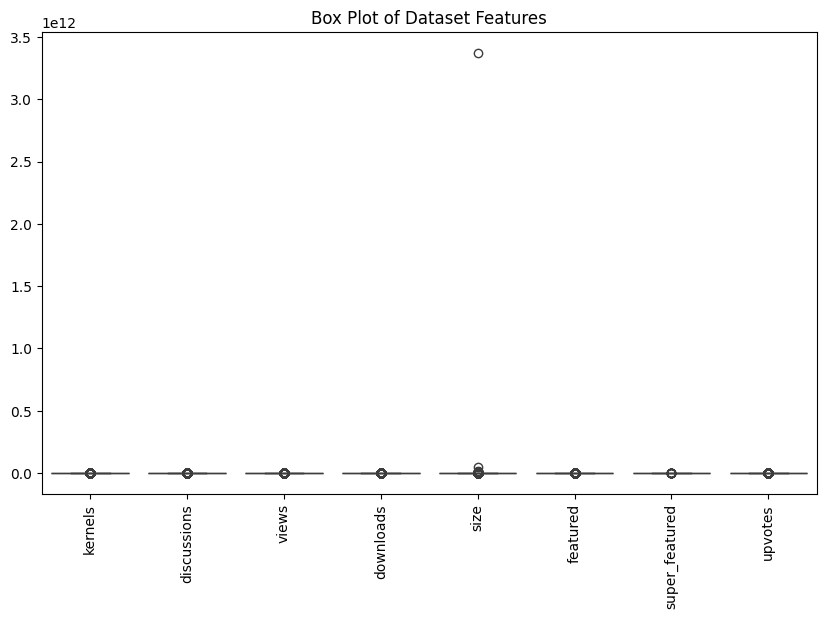

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = "/content/drive/My Drive/Colab Notebooks/datasets.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Box plot for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Dataset Features')
plt.show()


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: List files in Google Drive root directory
!ls /content/drive/My\ Drive/

# Step 3: List files in the Colab Notebooks directory (or any suspected directory)
!ls /content/drive/My\ Drive/Colab\ Notebooks/

# After verifying the correct path to the CSV file, update the file path below
file_path = "/content/drive/My Drive/Colab Notebooks/datasets.csv"  # Update this to your actual file path

# Step 4: Read the CSV file
import pandas as pd

dataset = pd.read_csv(file_path)

# Continue with your analysis
# Calculate the correlation coefficient between views and downloads
correlation = dataset['views'].corr(dataset['downloads'])
print("Correlation coefficient between views and downloads:", correlation)

Mounted at /content/drive
 217759379_1457858674578331_8672553499442157435_n.jpg
 AALIYAH2.docx
'ACT#1 - [TAPAR, EDEL MAE T.]-converted.pdf'
'ACT#2-TAPAR, EDEL MAE T.pdf'
 ACT3-Differentiation-of-Trancendental-Functions-Tapar_BSCOE1-3.pdf
'ACT#3-[TAPAR, EDEL MAE T.].pdf'
'ARDUINO ACTICITY'
'ASSIGNMENT 1.pdf'
 B612_20210630_175257_035.jpg
'BSCOE1-3_SETS THEORY.gdoc'
 BSCOE2-3_TAPAR_ACT1.pdf
 BSCOE2-3_TAPAR_ACT2.pdf
'BSCOE 2-3_TAPAR_ACT3.pdf'
'BSCOE 2-3_TAPAR_FINALS.pdf'
 Classroom
'CMPE 40163- Intro to Big Data Laboratory Requirement.gdoc'
'Colab Notebooks'
'Domain and Range Examples.pdf'
'Drugs Awareness and prevetion brochure.pdf'
'Edel Mae Tapar - Chapter 1 Written Activities.gdoc'
'Edel Mae Tapar - Fitness Activity Sheet.gdoc'
'Edel Mae Tapar - par-q.gdoc'
'EDEL MAE T. TAPAR (1) (1).pdf'
'EDEL MAE T. TAPAR  (1).pdf'
'EDEL MAE T. TAPAR (1).pdf'
'EDEL MAE T. TAPAR (2) (1).pdf'
'EDEL MAE T. TAPAR  (2).pdf'
'EDEL MAE T. TAPAR (2).pdf'
'EDEL MAE T. TAPAR (3).pdf'
'EDEL MAE T. TAPAR .pdf'
